In [52]:
migVSmoney=pd.read_csv("FinalData/MigVsMoney_Cont_Reg31.csv")
migVSmoney.head()


,Recipient,Report Year,3yrAverage Money,3yrAverage Money per cap,Emigration per cap over all OECD,Emigration sum over all OECD countries,Continent,Region
0,Afghanistan,1996.0,8.471000e+07,18.218528,0.000716,12765.0,ASIA,SouthernAsia
1,Afghanistan,1997.0,1.530267e+08,15.158800,0.000715,13137.0,ASIA,SouthernAsia
2,Afghanistan,1998.0,2.553067e+08,14.351002,0.000645,12173.0,ASIA,SouthernAsia
3,Afghanistan,1999.0,2.446233e+08,13.321431,0.000613,11885.0,ASIA,SouthernAsia
4,Afghanistan,2000.0,2.410600e+08,12.825481,0.000824,16550.0,ASIA,SouthernAsia


In [53]:
migVSmoney["Report Year"]=migVSmoney["Report Year"].astype(int)
migVSmoney["Emigration per cap over all OECD"]=migVSmoney["Emigration per cap over all OECD"]*1000000
migVSmoney["3yrAverage Money"]=migVSmoney["3yrAverage Money"]/1000000

migVSmoney.head(30)

,Recipient,Report Year,3yrAverage Money,3yrAverage Money per cap,Emigration per cap over all OECD,Emigration sum over all OECD countries,Continent,Region
0,Afghanistan,1996,84.710000,18.218528,716.209392,12765.0,ASIA,SouthernAsia
1,Afghanistan,1997,153.026667,15.158800,714.666522,13137.0,ASIA,SouthernAsia
2,Afghanistan,1998,255.306667,14.351002,645.303223,12173.0,ASIA,SouthernAsia
3,Afghanistan,1999,244.623333,13.321431,612.502577,11885.0,ASIA,SouthernAsia
4,Afghanistan,2000,241.060000,12.825481,823.628944,16550.0,ASIA,SouthernAsia
5,Afghanistan,2001,206.540000,10.633493,946.914051,19853.0,ASIA,SouthernAsia
6,Afghanistan,2002,344.706667,16.830094,688.944495,15143.0,ASIA,SouthernAsia
7,Afghanistan,2003,903.793333,41.875147,586.516367,13528.0,ASIA,SouthernAsia
8,Afghanistan,2004,1485.806667,66.674396,550.064265,13267.0,ASIA,SouthernAsia
9,Afghanistan,2005,2136.386667,92.325087,674.324917,16906.0,ASIA,SouthernAsia


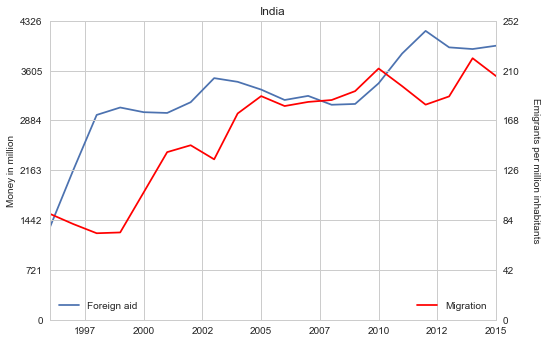

In [87]:
recipient="India"
data=migVSmoney[migVSmoney["Recipient"]==recipient]

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from  matplotlib.ticker import FuncFormatter

sns.set_style("whitegrid")

def align_y_axis(ax1, ax2, minresax1, minresax2):
    """ Sets tick marks of twinx axes to line up with 7 total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * 6
    ax2factor = minresax2 * 6
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               7))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               7))

np.random.seed(0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = data['Report Year'].astype(int).as_matrix(columns=None)
y1=data['3yrAverage Money'].as_matrix(columns=None)
y2=data['Emigration per cap over all OECD'].as_matrix(columns=None)

ax1.plot(x,y1,label='Foreign aid',)
plt.ylim(0,)
plt.legend(loc="lower left")
plt.ylabel('Money in million', fontsize=10)


ax2 = ax1.twinx()
ax2.plot(x,y2, color="red", label='Migration')
plt.ylim(0,)
plt.legend(loc="lower right")
plt.ylabel('Emigrants per million inhabitants', fontsize=10, rotation=270, labelpad=20)

ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
#ax1.set_yticks(np.linspace(ax1.get_yticks()[0],ax1.get_yticks()[-1],len(ax2.get_yticks())))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.margins(x=0)


# ADD THIS LINE
align_y_axis(ax1, ax2, 1, 1)
plt.xlabel('Years', fontsize=10)
plt.title(recipient)
plt.show()

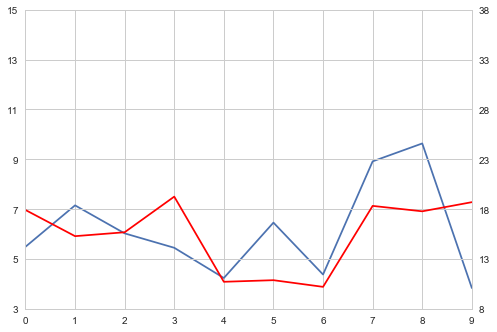

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_style("whitegrid")

def align_y_axis(ax1, ax2, minresax1, minresax2):
    """ Sets tick marks of twinx axes to line up with 7 total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * 6
    ax2factor = minresax2 * 6
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               7))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               7))

np.random.seed(0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pd.Series(np.random.uniform(0,10,size=10)))
ax2 = ax1.twinx()
ax2.plot(pd.Series(np.random.uniform(10,20,size=10)),color='r')
ax2.set_yticks(np.linspace(ax2.get_yticks()[0],ax2.get_yticks()[-1],len(ax1.get_yticks())))
ax1.set_yticks(np.linspace(ax1.get_yticks()[0],ax1.get_yticks()[-1],len(ax2.get_yticks())))

plt.margins(x=0)

# ADD THIS LINE
align_y_axis(ax1, ax2, 1, 5)
plt.show()

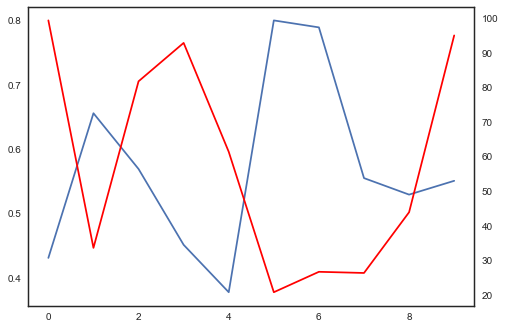

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("white")

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))
ax2 =ax.twinx()
ax2.plot(100*np.random.rand(10),color='r')
#sns.despine(ax=ax, right=True, left=True)
#sns.despine(ax=ax2, left=True, right=False)
#ax2.spines['right'].set_color('white')
plt.show()
